In [11]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
data = pd.read_csv('/Users/suryanshpatel/Projects/PDS/ASSINGMENT-3/data-raw/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

In [9]:
df_random_25 = data.sample(n = 25 , random_state=13)
mean = df_random_25['Glucose'].mean()
maxi = df_random_25['Glucose'].max()

print('mean glucose values' , mean)
print('max glucose values' , maxi)

mean glucose values 115.28
max glucose values 161


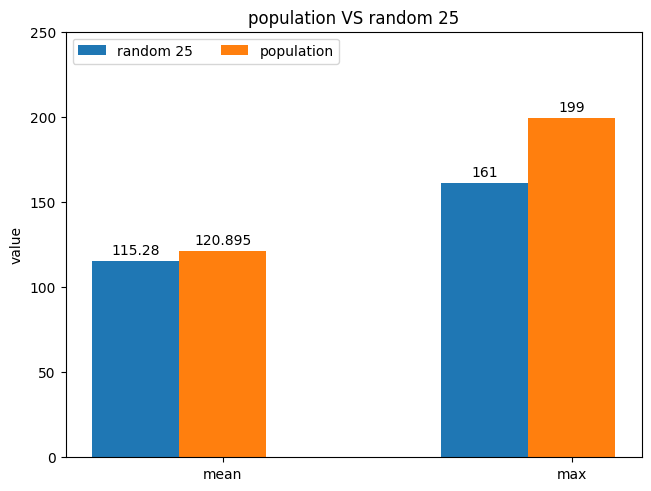

In [10]:
species = ('mean' , 'max')
penguin_means = {
    'random 25': (mean, maxi),
    'population': (data['Glucose'].mean() , data['Glucose'].max())
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('population VS random 25')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. (5 points)

In [12]:
percentile_95_population = data['BMI'].quantile(0.95)
percentile_95_random_25 = df_random_25['BMI'].quantile(0.95)
print(percentile_95_population)
print(percentile_95_random_25)

44.394999999999996
40.5


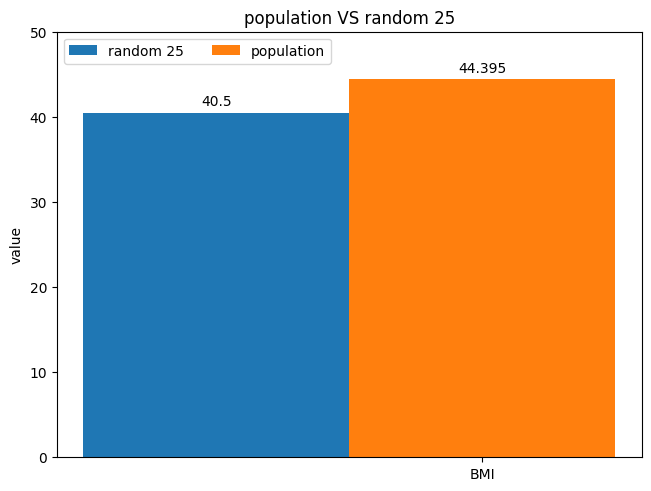

In [19]:
species = (["BMI"])
penguin_means = {
    'random 25': (percentile_95_random_25),
    'population': (percentile_95_population),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('population VS random 25')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 50)

plt.show()

c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. (10 points)

In [20]:
column_name = 'BloodPressure' 
# Bootstrap sampling
n_samples = 500
sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(n_samples):
    sample = data[column_name].sample(n=sample_size, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(sample.quantile(0.95))


In [21]:
population_mean = data[column_name].mean()
population_std = data[column_name].std()
population_percentile_95 = data[column_name].quantile(0.95)


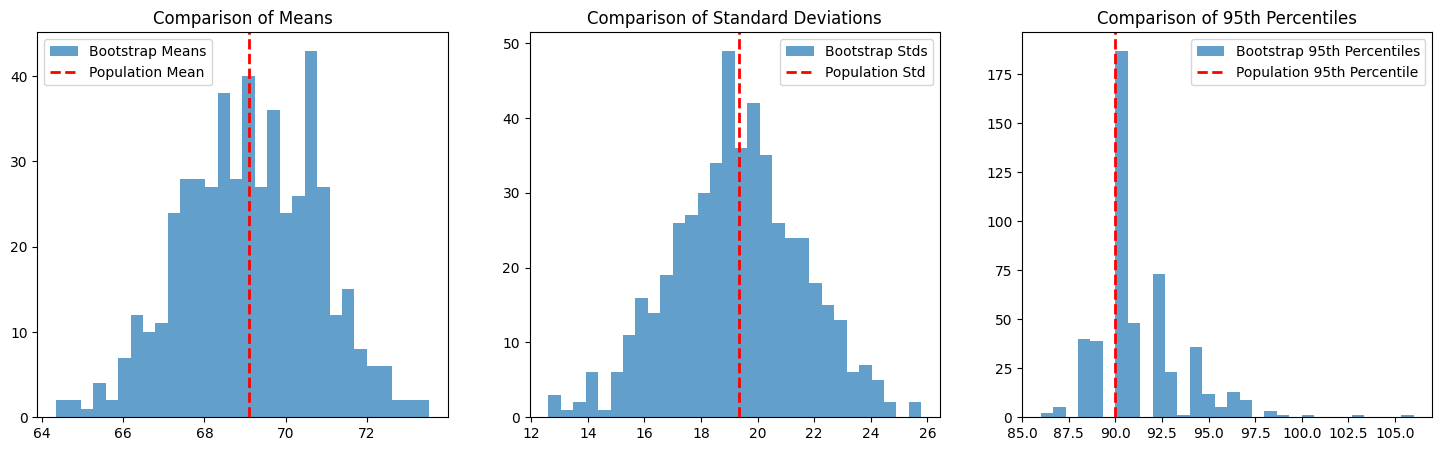

In [22]:
# Calculate the average of the bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_percentile_95 = np.mean(bootstrap_percentiles)

# Create charts for comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean comparison
axes[0].hist(bootstrap_means, bins=30, alpha=0.7, label='Bootstrap Means')
axes[0].axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
axes[0].set_title('Comparison of Means')
axes[0].legend()

# Standard deviation comparison
axes[1].hist(bootstrap_stds, bins=30, alpha=0.7, label='Bootstrap Stds')
axes[1].axvline(population_std, color='red', linestyle='dashed', linewidth=2, label='Population Std')
axes[1].set_title('Comparison of Standard Deviations')
axes[1].legend()

# 95th percentile comparison
axes[2].hist(bootstrap_percentiles, bins=30, alpha=0.7, label='Bootstrap 95th Percentiles')
axes[2].axvline(population_percentile_95, color='red', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
axes[2].set_title('Comparison of 95th Percentiles')
axes[2].legend()

plt.show()


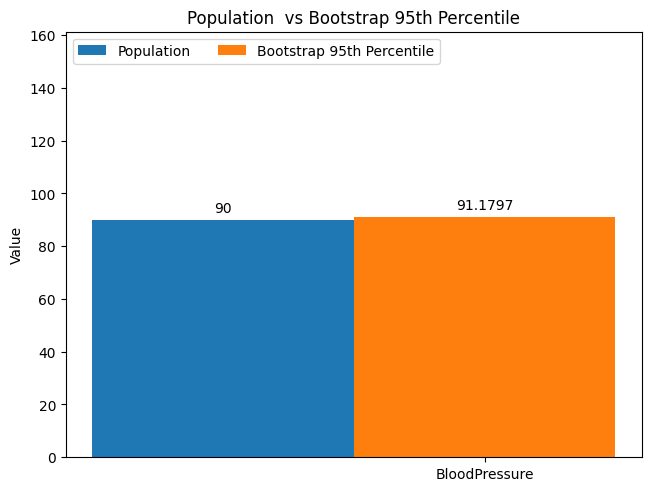

In [33]:
# Prepare data for plotting
species = ["BloodPressure"]
percentile_95_random_25 = np.percentile(data.sample(n=25), 95)
penguin_means = {
    'Population': [population_percentile_95],
    'Bootstrap 95th Percentile': [avg_bootstrap_percentile_95]
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value')
ax.set_title('Population  vs Bootstrap 95th Percentile')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(population_percentile_95, percentile_95_random_25, avg_bootstrap_percentile_95) * 1.1)

plt.show()

# Report Findings
- mean of orignal vs bootstraped is almost same
- std of original vs bootstraped is almost same
- 95th percentile of original vs bootstraped gets shifted by 1

In [30]:
print(f"Population Mean: {population_mean}")
print(f"Bootstrap Mean of Means: {np.array(bootstrap_means).mean()}")
print(f"Population Std Dev: {population_std}")
print(f"Bootstrap Mean of Std Devs: {np.array(bootstrap_stds).mean()}")
print(f"Population 95th Percentile: {population_percentile_95}")
print(f"Bootstrap Mean of 95th Percentiles: {avg_bootstrap_percentile_95}")

Population Mean: 69.10546875
Bootstrap Mean of Means: 69.13602666666667
Population Std Dev: 19.355807170644777
Bootstrap Mean of Std Devs: 19.279576526550446
Population 95th Percentile: 90.0
Bootstrap Mean of 95th Percentiles: 91.17969999999998
